# GradientBoostingClassifier for DevCentre Hackathon
I decided to have a tutorial on the approach i used in winning the devcenter ML hackathon.So, let's get started!!!.

In [1]:
#import neccssary libraries
import pandas as pd #for data processing
import numpy as np #for linear algebra
%matplotlib inline

#for the Algorithm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV

#for visualization
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 3


# Exploration of the dataset
The dataset given contained binary values in the target column. I could have used a Logistics regression but i decided to go with the GBC. Let's take a look at the dataset.

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('train.csv')
print("Train Data")
print(train_data.head(3))
print("Test Data")
print(test_data.head(3))

Train Data
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62    0.0  
1  0.167170  0.125895 -0.008983  0.014724    2.69    0.0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66    0.0  

[3 rows x 31 columns]
Test Data
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.0727

In [3]:
train_data.shape

(170886, 31)

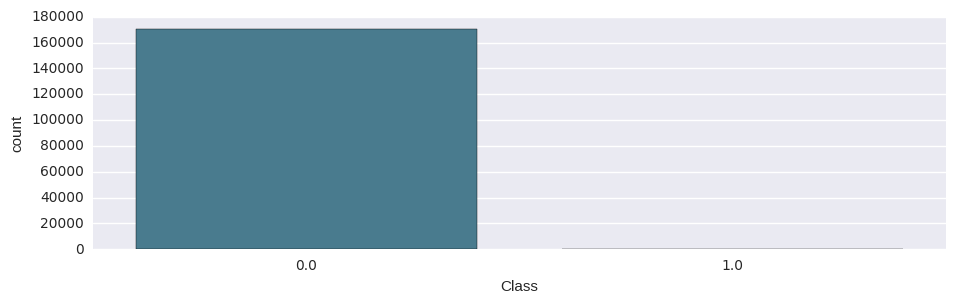

In [24]:
sns.countplot(x="Class",data= train_data, palette="GnBu_d")

This distribution shows that the dataset is not balance.Strategies such as collection of more data or using of different algorithm could be employed. Don't worry GBC will take good care of this.

I didn't find the time column to be really important.So,I didn't use it. 

In [4]:
features = [columns for columns in train_data.columns if columns not in ["Class", "Time"] ]
print(features)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


# LETS GET STARTED WITH THE TRAINNING.
First let's have a feel of GBC.


In [5]:
def hackathon_GBC_model(clf, train, features):
    clf.fit(train[features], train["Class"])
    probab_of_predict = clf.predict_proba(train[features])[:,1]
    predict_train = clf.predict(train[features])


    cv_score = cross_val_score(clf,train[features], train["Class"], cv = 5, scoring="roc_auc")

    print("----------------------Model performance-----------------------")
    print("Accuracy score: ", accuracy_score(train["Class"].values, predict_train))
    print("AUC: ", roc_auc_score(train["Class"],probab_of_predict) )
    print("CV score: Mean - {}, Max - {}, Min - {}, Std - {}".format(np.mean(cv_score), np.max(cv_score),
                                                                     np.min(cv_score), np.std(cv_score)))

    Relative_Feature_importance = pd.Series(clf.feature_importances_, features).sort_values(ascending=False)
    Relative_Feature_importance.plot(kind='bar', title='Order of Feature Importance')
    plt.ylabel('Feature Importance')
    plt.show()




----------------------Model performance-----------------------
Accuracy score:  0.999420666409
AUC:  0.955667219857
CV score: Mean - 0.6497444229874608, Max - 0.9950612080340127, Min - 0.1933811743779198, Std - 0.28574055008042426


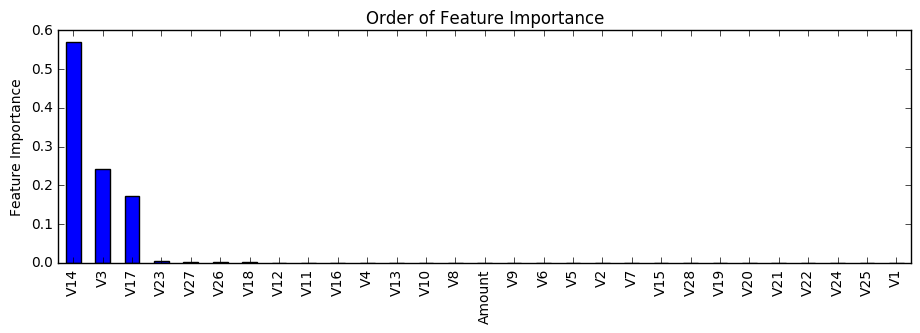

None


In [6]:
clf = GradientBoostingClassifier(random_state=15)
print(hackathon_GBC_model(clf, train_data, features))


# Let's start with tunning of the parameters.
1) Get the n_estimators. we use the Gvsearch for this.



In [7]:
estimators = [x for x in range(10,131,10)]
first_tune = {'n_estimators': estimators}
first_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,min_samples_split=700,
                                                                 min_samples_leaf=70,
                                                                 max_depth=8,max_features='sqrt',subsample=0.8, 
                                                                 random_state=15, 
                                                                 )
                   , param_grid=first_tune,scoring='roc_auc', n_jobs=6, iid=False, cv=5)

first_search.fit(train_data[features], train_data["Class"])

print(first_search.grid_scores_ , first_search.best_params_, first_search.best_score_)



[mean: 0.83381, std: 0.11022, params: {'n_estimators': 10}, mean: 0.82112, std: 0.09598, params: {'n_estimators': 20}, mean: 0.85345, std: 0.03261, params: {'n_estimators': 30}, mean: 0.88329, std: 0.02424, params: {'n_estimators': 40}, mean: 0.78872, std: 0.22527, params: {'n_estimators': 50}, mean: 0.79531, std: 0.21053, params: {'n_estimators': 60}, mean: 0.72746, std: 0.22459, params: {'n_estimators': 70}, mean: 0.72091, std: 0.23537, params: {'n_estimators': 80}, mean: 0.71720, std: 0.24101, params: {'n_estimators': 90}, mean: 0.67742, std: 0.23414, params: {'n_estimators': 100}, mean: 0.69615, std: 0.24451, params: {'n_estimators': 110}, mean: 0.68438, std: 0.25182, params: {'n_estimators': 120}, mean: 0.71519, std: 0.21063, params: {'n_estimators': 130}] {'n_estimators': 40} 0.883290664027


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Good!!!, forty did the job.
let's fix our n_estimators to 40.


# Let's tune tree specific parameters

Now let's tune the max_depth and min_samples_split parameter.
NB- These processes are computationally expensive,it depends highly on the tuning and system used. A good understanding of the model and having a good instincts will help in not repeating processes.

In [6]:
min_split = [x for x in range(300,1101,100)]
depth = [x for x in range(5,15,1)]
second_tune = {'max_depth':depth, 'min_samples_split':min_split}
second_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,n_estimators = 40,
                                                                  min_samples_split=450,
                                                                 min_samples_leaf=70,
                                                                  max_depth=8,max_features='sqrt',subsample=0.8, 
                                                                 random_state=15
                                                                 )
                   , param_grid=second_tune,scoring='roc_auc', n_jobs=6, iid=False, cv=5)

second_search.fit(train_data[features], train_data["Class"])

print(second_search.grid_scores_ , second_search.best_params_, second_search.best_score_)

[mean: 0.82742, std: 0.13157, params: {'min_samples_split': 300, 'max_depth': 5}, mean: 0.85410, std: 0.05544, params: {'min_samples_split': 400, 'max_depth': 5}, mean: 0.76108, std: 0.15954, params: {'min_samples_split': 500, 'max_depth': 5}, mean: 0.72960, std: 0.17131, params: {'min_samples_split': 600, 'max_depth': 5}, mean: 0.74128, std: 0.18396, params: {'min_samples_split': 700, 'max_depth': 5}, mean: 0.73495, std: 0.16947, params: {'min_samples_split': 800, 'max_depth': 5}, mean: 0.69350, std: 0.17094, params: {'min_samples_split': 900, 'max_depth': 5}, mean: 0.70975, std: 0.19064, params: {'min_samples_split': 1000, 'max_depth': 5}, mean: 0.72439, std: 0.15229, params: {'min_samples_split': 1100, 'max_depth': 5}, mean: 0.77450, std: 0.14819, params: {'min_samples_split': 300, 'max_depth': 6}, mean: 0.71253, std: 0.15098, params: {'min_samples_split': 400, 'max_depth': 6}, mean: 0.84991, std: 0.07304, params: {'min_samples_split': 500, 'max_depth': 6}, mean: 0.85462, std: 0.057

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Following from the result above. We found our max_depth and min_samples_split parameters to be 11 and 800 respectively.With a CV of 0.91317, Good!!!. Now lets go ahead to get our min_samples_leaf.

In [7]:
min_sample_leaf = [x for x in range(20,200,10)]
third_tune = {'min_samples_leaf':min_sample_leaf}
third_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,n_estimators = 40,
                                                                  min_samples_split=800,
                                                                 min_samples_leaf=50,
                                                                 max_depth=11,max_features='sqrt',subsample=0.8, 
                                                                 random_state=15, 
                                                                 )
                   , param_grid=third_tune,scoring='roc_auc', n_jobs=6, iid=False, cv=5)

third_search.fit(train_data[features], train_data["Class"])

print(third_search.grid_scores_ , third_search.best_params_, third_search.best_score_)

[mean: 0.74225, std: 0.17400, params: {'min_samples_leaf': 20}, mean: 0.58945, std: 0.24913, params: {'min_samples_leaf': 30}, mean: 0.70034, std: 0.23398, params: {'min_samples_leaf': 40}, mean: 0.71706, std: 0.26419, params: {'min_samples_leaf': 50}, mean: 0.64046, std: 0.19419, params: {'min_samples_leaf': 60}, mean: 0.91318, std: 0.03047, params: {'min_samples_leaf': 70}, mean: 0.72246, std: 0.22371, params: {'min_samples_leaf': 80}, mean: 0.74849, std: 0.21372, params: {'min_samples_leaf': 90}, mean: 0.62931, std: 0.26357, params: {'min_samples_leaf': 100}, mean: 0.89877, std: 0.04033, params: {'min_samples_leaf': 110}, mean: 0.92552, std: 0.02703, params: {'min_samples_leaf': 120}, mean: 0.90946, std: 0.04418, params: {'min_samples_leaf': 130}, mean: 0.96377, std: 0.02846, params: {'min_samples_leaf': 140}, mean: 0.93027, std: 0.05449, params: {'min_samples_leaf': 150}, mean: 0.96403, std: 0.03523, params: {'min_samples_leaf': 160}, mean: 0.97249, std: 0.02354, params: {'min_samp

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


We found a higher CV to be 0.97248,Wow!!!. We are doing great.
Now let's see how far we've gone with the tunning.

----------------------Model performance-----------------------
Accuracy score:  0.999280221902
AUC:  0.994999190413
CV score: Mean - 0.972488450484232, Max - 0.9972589541103879, Min - 0.9309959846226523, Std - 0.023537995775059176


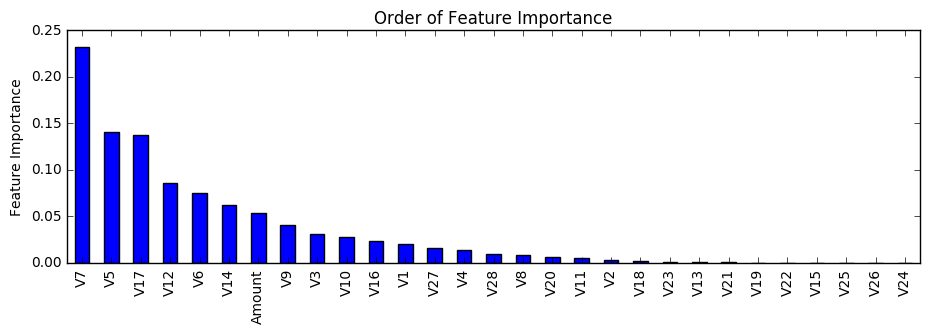

None


In [9]:
clf = GradientBoostingClassifier(learning_rate=0.05,n_estimators = 40,min_samples_split=800,min_samples_leaf=170,
                                max_depth=11,random_state=15,max_features='sqrt',subsample=0.8 )
print(hackathon_GBC_model(clf, train_data, features))

We can see a great improvement from about 0.61 to 0.97, We can still do more and also reduce the standard deviation. Let's tune the max_feat and also the subsample.

In [6]:
max_feat = [x for x in range(10,29,2)]
fourth_tune = {'max_features':max_feat}
fourth_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,n_estimators = 40,
                                                                  min_samples_split=800,
                                                                 min_samples_leaf=170,
                                                                 max_depth=11,max_features='sqrt',subsample=0.8, 
                                                                 random_state=15, 
                                                                 )
                   , param_grid=fourth_tune,scoring='roc_auc', n_jobs=6, iid=False, cv=5)

fourth_search.fit(train_data[features], train_data["Class"])

print(fourth_search.grid_scores_ , fourth_search.best_params_, fourth_search.best_score_)

[mean: 0.77553, std: 0.25845, params: {'max_features': 10}, mean: 0.94608, std: 0.03977, params: {'max_features': 12}, mean: 0.93087, std: 0.05701, params: {'max_features': 14}, mean: 0.76162, std: 0.30697, params: {'max_features': 16}, mean: 0.80063, std: 0.27791, params: {'max_features': 18}, mean: 0.63385, std: 0.26569, params: {'max_features': 20}, mean: 0.72653, std: 0.29739, params: {'max_features': 22}, mean: 0.29355, std: 0.20090, params: {'max_features': 24}, mean: 0.35048, std: 0.21206, params: {'max_features': 26}, mean: 0.21711, std: 0.06475, params: {'max_features': 28}] {'max_features': 12} 0.946083854991


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [9]:
sub_sample = [0.5,0.55,0.6,0.65,0.7]
fifth_tune = {'subsample': sub_sample}
fifth_search = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,n_estimators = 40,
                                                                  min_samples_split=800,
                                                                 min_samples_leaf=170,
                                                                 max_depth=11,max_features=12,subsample=0.8, 
                                                                 random_state=15, 
                                                                 )
                   ,param_grid=fifth_tune,scoring='roc_auc', n_jobs=6, iid=False, cv=5)

fifth_search.fit(train_data[features], train_data["Class"])

print(fifth_search.grid_scores_ , fifth_search.best_params_, fifth_search.best_score_)

[mean: 0.96676, std: 0.02663, params: {'subsample': 0.5}, mean: 0.97170, std: 0.02276, params: {'subsample': 0.55}, mean: 0.95399, std: 0.04509, params: {'subsample': 0.6}, mean: 0.78809, std: 0.36052, params: {'subsample': 0.65}, mean: 0.82433, std: 0.28167, params: {'subsample': 0.7}] {'subsample': 0.55} 0.971695691546


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Finally, we got a subsample of 0.55 and max_feature of 12. Good!!!.

----------------------Model performance-----------------------
Accuracy score:  0.999087110705
AUC:  0.993653566351
CV score: Mean - 0.9716956915462518, Max - 0.9949768532092758, Min - 0.93810861880793, Std - 0.022757777157603284


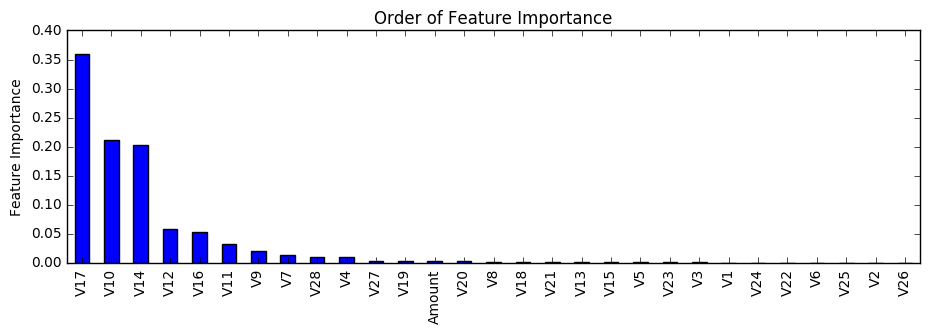

None


In [10]:
clf = GradientBoostingClassifier(learning_rate=0.05,n_estimators = 40,min_samples_split=800,min_samples_leaf=170,
                                max_depth=11,random_state=15,max_features=12,subsample=0.55 )
print(hackathon_GBC_model(clf, train_data, features))

We are done!!! we got our CV to be 0.97169 and AUC to be 0.9936. 

We could reduce our learning rate while also increasing our number of estimators to get higher CV score.
But this did the job for me to win the devcentre hackathon.
Thanks to devcentre for the opportunity.